## Loading and Setup

In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [18]:
# Load the dataset
df = pd.read_parquet('accepted_2007_to_2018Q4.parquet')

## Assessment

In [19]:
# Display the sample rows of the dataframe
df.sample(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
13012,65712545,NaN,20000.0,20000.0,20000.0,60 months,10.64,431.27,B,B4,...,NaN,NaN,Cash,N,None,None,None,NaN,NaN,NaN
12300,67645780,NaN,6200.0,6200.0,6200.0,36 months,13.67,210.91,C,C4,...,NaN,NaN,Cash,N,None,None,None,NaN,NaN,NaN
22032,67095169,NaN,11000.0,11000.0,11000.0,36 months,8.38,346.64,B,B1,...,NaN,NaN,Cash,N,None,None,None,NaN,NaN,NaN
4545,68523778,NaN,14400.0,14400.0,14400.0,36 months,9.80,463.30,B,B3,...,NaN,NaN,Cash,N,None,None,None,NaN,NaN,NaN
21130,67275174,NaN,20000.0,20000.0,20000.0,36 months,14.48,688.23,C,C5,...,NaN,NaN,Cash,N,None,None,None,NaN,NaN,NaN
7704,67949760,NaN,15000.0,15000.0,15000.0,60 months,10.64,323.45,B,B4,...,NaN,NaN,Cash,N,None,None,None,NaN,NaN,NaN
7438,67818735,NaN,20075.0,20075.0,20075.0,60 months,18.20,511.96,E,E1,...,NaN,NaN,Cash,N,None,None,None,NaN,NaN,NaN
16545,67407984,NaN,11200.0,11200.0,11200.0,36 months,9.17,357.05,B,B2,...,NaN,NaN,Cash,N,None,None,None,NaN,NaN,NaN
18796,67255215,NaN,35000.0,35000.0,34925.0,60 months,18.20,892.59,E,E1,...,NaN,NaN,Cash,N,None,None,None,NaN,NaN,NaN
19846,67455842,NaN,10000.0,10000.0,10000.0,36 months,9.17,318.79,B,B2,...,NaN,NaN,Cash,N,None,None,None,NaN,NaN,NaN


In [20]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22511 entries, 0 to 22510
Columns: 151 entries, id to settlement_term
dtypes: float64(114), int64(1), object(36)
memory usage: 25.9+ MB


In [21]:
# Check the shape of the dataframe
df.nunique()

id                       22511
member_id                    0
loan_amnt                 1140
funded_amnt               1140
funded_amnt_inv           1190
                         ...  
settlement_status            3
settlement_date             34
settlement_amount          652
settlement_percentage       86
settlement_term             24
Length: 151, dtype: int64

In [22]:
# Get a statistical summary of the dataset
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,2.251100e+04,0.0,22511.000000,22511.000000,22511.000000,22511.000000,22511.000000,2.251100e+04,22509.000000,22510.000000,...,180.0,180.000000,180.0,180.000000,144.000000,180.000000,180.000000,662.000000,662.000000,662.000000
mean,6.756447e+07,NaN,15031.787793,15031.787793,15025.527520,12.255020,436.321286,7.820695e+04,19.423974,0.335584,...,3.0,130.504278,3.0,14.272222,390.468542,10659.213444,183.667111,4980.598958,47.125378,13.823263
std,1.843754e+06,NaN,8734.651784,8734.651784,8729.680902,4.213027,249.411778,6.125830e+04,11.006613,0.887691,...,0.0,108.186827,0.0,10.296081,320.493440,6503.722235,178.053547,3596.196186,5.255945,7.501520
min,3.617740e+05,NaN,1000.000000,1000.000000,1000.000000,5.320000,30.540000,0.000000e+00,0.000000,0.000000,...,3.0,5.280000,3.0,0.000000,33.840000,594.070000,0.060000,250.000000,30.000000,0.000000
25%,6.729818e+07,NaN,8000.000000,8000.000000,8000.000000,9.170000,255.040000,4.800000e+04,12.700000,0.000000,...,3.0,48.422500,3.0,4.750000,145.267500,5622.290000,50.665000,2069.297500,45.000000,8.000000
50%,6.752576e+07,NaN,13975.000000,13975.000000,13900.000000,11.990000,379.390000,6.700000e+04,18.840000,0.000000,...,3.0,97.285000,3.0,15.500000,291.855000,9526.755000,122.320000,4172.365000,45.000000,14.000000
75%,6.811268e+07,NaN,20000.000000,20000.000000,20000.000000,14.480000,579.130000,9.500000e+04,25.660000,0.000000,...,3.0,178.272500,3.0,24.250000,528.727500,15028.415000,269.147500,7160.005000,50.000000,18.000000
max,6.861706e+07,NaN,35000.000000,35000.000000,35000.000000,28.990000,1354.660000,3.964280e+06,999.000000,15.000000,...,3.0,629.700000,3.0,30.000000,1889.100000,28479.590000,780.050000,17500.000000,67.450000,36.000000


Here are some of the key statistics:

- The average loan amount (loan_amnt) is approximately $15,031.8.
- The minimum loan amount is $1,000, and the maximum is $35,000.
- The average interest rate (int_rate) is approximately 12.255%.
- The average annual income (annual_inc) of borrowers is approximately $78,206.9.

In [23]:
# Check for missing values
df.isnull().sum()

id                           0
member_id                22511
loan_amnt                    0
funded_amnt                  0
funded_amnt_inv              0
                         ...  
settlement_status        21849
settlement_date          21849
settlement_amount        21849
settlement_percentage    21849
settlement_term          21849
Length: 151, dtype: int64

In [24]:
# Check for duplicate rows
df.duplicated().sum()

0

## Clearning

In [25]:
# Create a copy of the original dataframe
df_clean = df.copy()

# Drop the 'member_id' column
df_clean.drop('member_id', axis=1, inplace=True)

# Drop other rows with missing values
# df_clean.dropna(inplace=True)

# Display the first few rows of the cleaned dataframe
df_clean.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,...,NaN,NaN,Cash,N,None,None,None,NaN,NaN,NaN
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,...,NaN,NaN,Cash,N,None,None,None,NaN,NaN,NaN
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,...,NaN,NaN,Cash,N,None,None,None,NaN,NaN,NaN
3,66310712,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,...,NaN,NaN,Cash,N,None,None,None,NaN,NaN,NaN
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,...,NaN,NaN,Cash,N,None,None,None,NaN,NaN,NaN


In [26]:
# Check the columns of the dataframe
df_clean.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=150)

## EDA

In [27]:
print(df_clean['loan_status'].unique())

['Fully Paid' 'Current' 'Charged Off' 'In Grace Period'
 'Late (31-120 days)' 'Late (16-30 days)']


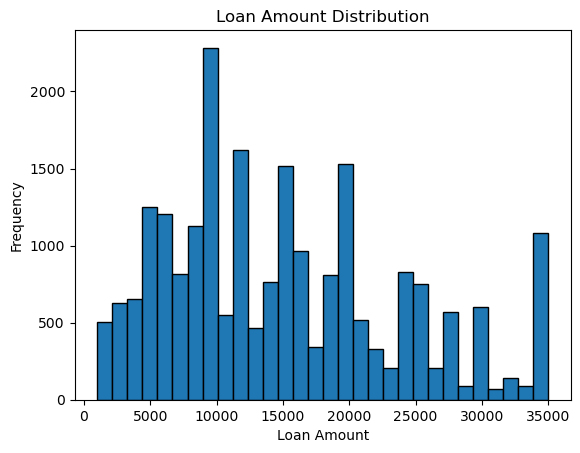

In [28]:
# Plot a histogram for the 'loan_amnt' column
plt.hist(df_clean['loan_amnt'], bins=30, edgecolor='black')
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

The histogram shows the distribution of loan amounts in the dataset: 
- Most of the loans are in the range of $5,000 to $20,000.

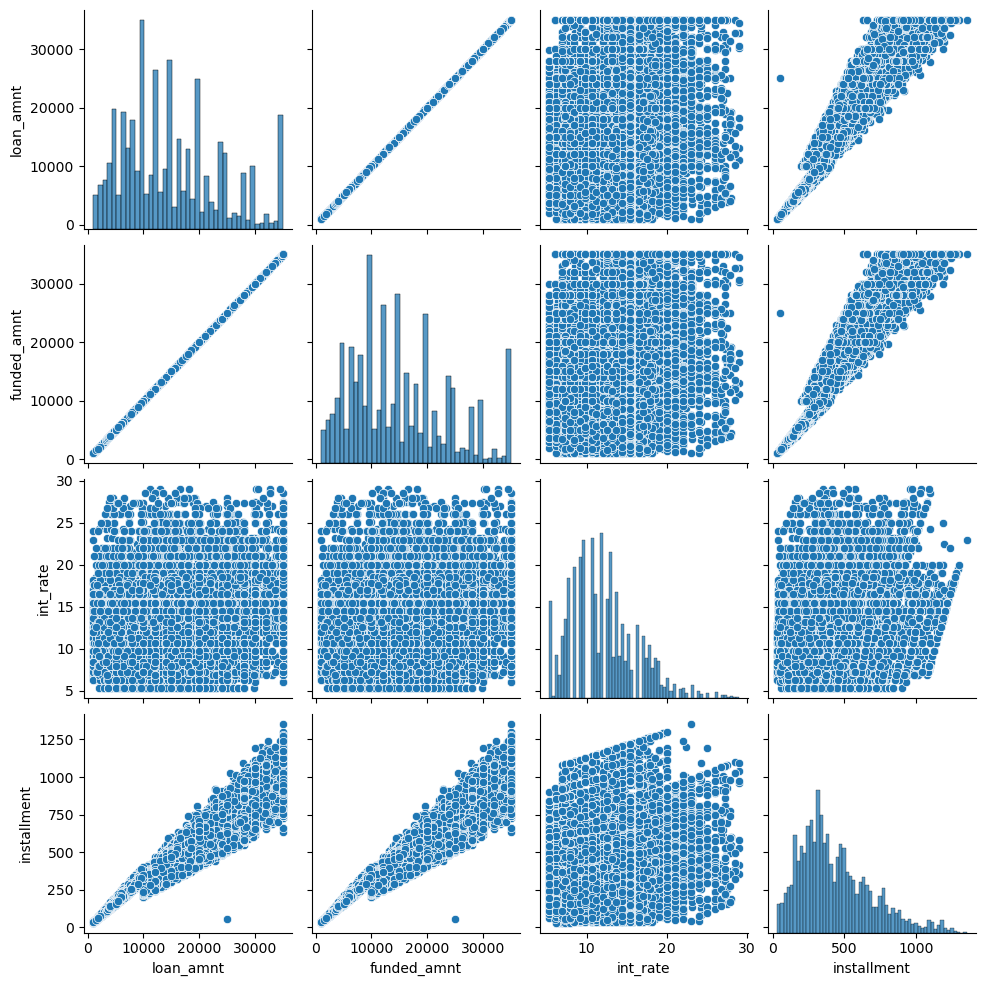

In [29]:
# Select a subset of columns for the pairplot
cols = ['loan_amnt', 'funded_amnt', 'int_rate', 'installment']

# Create a pairplot
sns.pairplot(df_clean[cols])

The reason for selecting these specific columns (loan_amnt, funded_amnt, int_rate, and installment) is because they are key numerical variables that are likely to have a significant impact on the loan status:

- loan_amnt: This is the amount of the loan applied for by the borrower. If the loan amount is high, it might be harder for the borrower to repay the loan, which could affect the loan status.
- funded_amnt: This is the total amount committed to that loan at that point in time. It's similar to loan_amnt and can also affect the loan status.
- int_rate: This is the interest rate on the loan. A higher interest rate means the borrower has to pay more over the life of the loan, which could make it harder for them to repay the loan.
- installment: This is the monthly payment owed by the borrower. If the installment is high, it might be harder for the borrower to keep up with payments, which could affect the loan status.

From the pairplot, we can observe the following:

- loan_amnt and funded_amnt are highly positively correlated, which is expected as the funded amount should be close to the loan amount. This is evident from the scatter plot which shows a nearly straight line, indicating a strong linear relationship.
- int_rate and installment show no clear correlation. The scatter plot does not show any clear trend, indicating that there might not be a strong linear relationship between interest rate and installment.
- The distributions of loan_amnt, funded_amnt, and installment are skewed to the right, indicating that most of the loans have lower amounts and installments. The distribution of int_rate seems to be more evenly spread out, but still shows a slight right skew.

In [30]:
# Initialize a label encoder
le = LabelEncoder()

# Convert 'loan_status' to numerical form
df_clean['loan_status'] = le.fit_transform(df_clean['loan_status'])

# Get the correlation of 'loan_status' with other variables
loan_status_corr = df_clean.corr()['loan_status']

# Sort the correlations
sorted_corr = loan_status_corr.sort_values(ascending=False)

# Display the sorted correlations
sorted_corr

/var/folders/ld/9fn5vq1d5xj0hkczvfgx86_w0000gn/T/ipykernel_6582/2518514161.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  loan_status_corr = df_clean.corr()['loan_status']


loan_status                            1.000000
last_fico_range_high                   0.580221
last_fico_range_low                    0.514585
total_rec_prncp                        0.387152
last_pymnt_amnt                        0.316959
                                         ...   
sec_app_chargeoff_within_12_mths            NaN
sec_app_collections_12_mths_ex_med          NaN
sec_app_mths_since_last_major_derog         NaN
deferral_term                               NaN
hardship_length                             NaN
Name: loan_status, Length: 115, dtype: float64

From this list, we can see that variables such as **last_fico_range_high, last_fico_range_low, total_rec_prncp, and last_pymnt_amnt** have relatively high positive correlations with **loan_status**. 

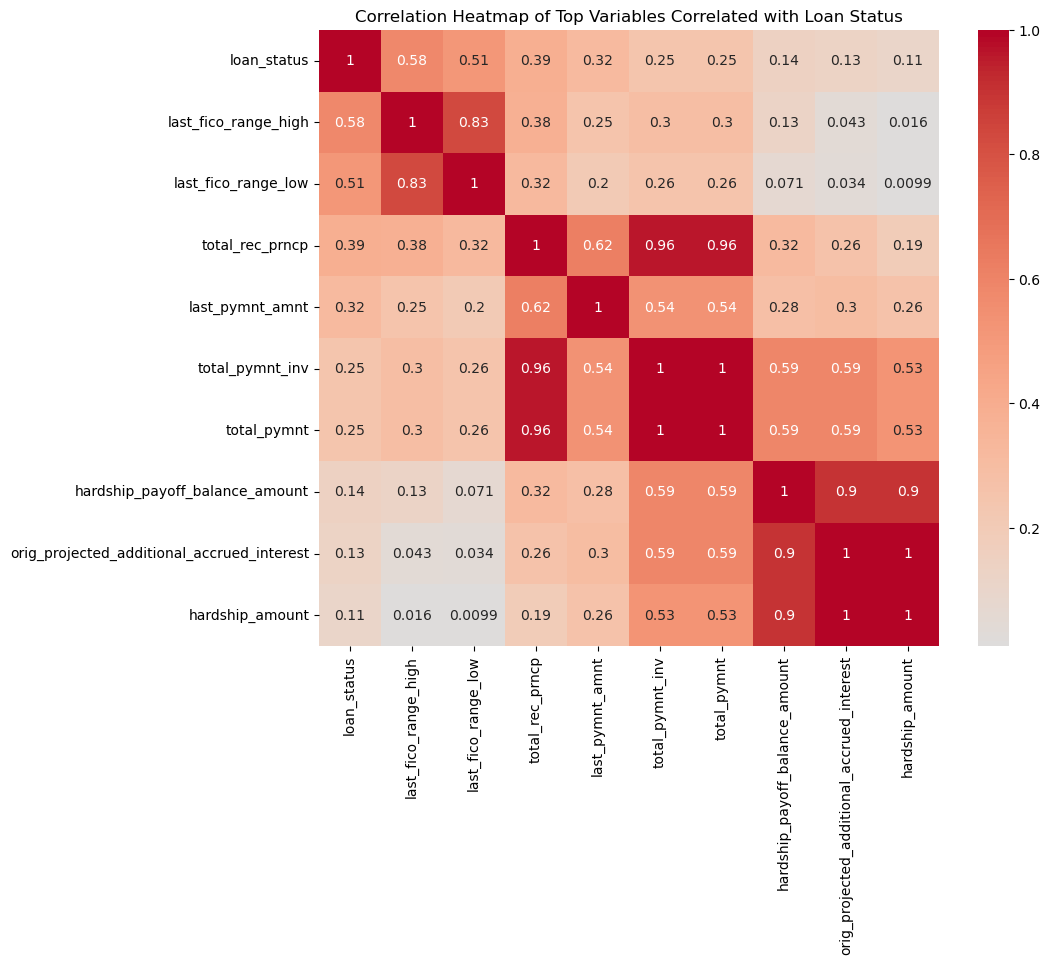

In [31]:
# Select the top 10 variables with the highest correlation with 'loan_status'
top_corr_vars = sorted_corr.index[:10]

# Create a correlation matrix for these variables
top_corr = df_clean[top_corr_vars].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(top_corr, cmap='coolwarm', center=0, annot=True)
plt.title('Correlation Heatmap of Top Variables Correlated with Loan Status')
plt.show()


The heatmap shows the correlation coefficients between the top 10 variables most correlated with loan_status. The color of each cell represents the strength and direction of the correlation: a color close to red indicates a strong positive correlation, a color close to blue indicates a strong negative correlation, and a color close to white or light purple indicates little to no correlation.

From this heatmap, we can see that **loan_status** has a strong positive correlation with **last_fico_range_high, last_fico_range_low, total_rec_prncp, and last_pymnt_amnt**. This suggests that these variables could be important features for predicting loan_status.